# Web Application Using Django Pre Processing File

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
 
data = pd.read_csv("michigan-history.csv")
data.head()

Importing plotly failed. Interactive plots will not work.


,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-01-26,MI,A+,15305.0,14405.0,86,900,NaN,NaN,1638.0,...,9171401,26969,481240.0,NaN,NaN,NaN,NaN,0,9269199.0,26808
1,2021-01-25,MI,A+,15219.0,14326.0,38,893,NaN,NaN,1668.0,...,9144432,58323,479890.0,NaN,NaN,NaN,NaN,0,9242391.0,60168
2,2021-01-24,MI,A+,15181.0,14291.0,0,890,NaN,NaN,1843.0,...,9086109,0,476180.0,NaN,NaN,NaN,NaN,0,9182223.0,0
3,2021-01-23,MI,A+,15181.0,14291.0,230,890,NaN,NaN,1843.0,...,9086109,52737,476180.0,NaN,NaN,NaN,NaN,0,9182223.0,53925
4,2021-01-22,MI,A+,14951.0,14070.0,18,881,NaN,NaN,1843.0,...,9033372,44844,474589.0,NaN,NaN,NaN,NaN,0,9128298.0,44578


In [2]:
dimension = data.shape
rows = dimension[0]
cols = dimension[1]
date = []
cases_diff = []
for i in range(0,rows):
    datevalue = data.iloc[i]["date"]
    date.append(datevalue)
    casesvalue = data.iloc[i]["positiveIncrease"]
    cases_diff.append(casesvalue)
records = len(cases_diff)
cases = []
date_reorder = []
for j in range(records-1,-1,-1):
    cases.append(cases_diff[j])
    date_reorder.append(date[j])
newdata = pd.DataFrame(list(zip(date_reorder,cases)))
newdata.columns = ['ds', 'y']
newdata

,ds,y
0,2020-03-01,0
1,2020-03-02,13
2,2020-03-03,23
3,2020-03-04,24
4,2020-03-05,26
...,...,...
327,2021-01-22,2538
328,2021-01-23,1826
329,2021-01-24,0
330,2021-01-25,3347


In [3]:
from fbprophet import Prophet

m = Prophet()
m.fit(newdata)
#period = rows - splitrows
future = m.make_future_dataframe(periods = 1000)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
1327,2023-10-19
1328,2023-10-20
1329,2023-10-21
1330,2023-10-22
1331,2023-10-23


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


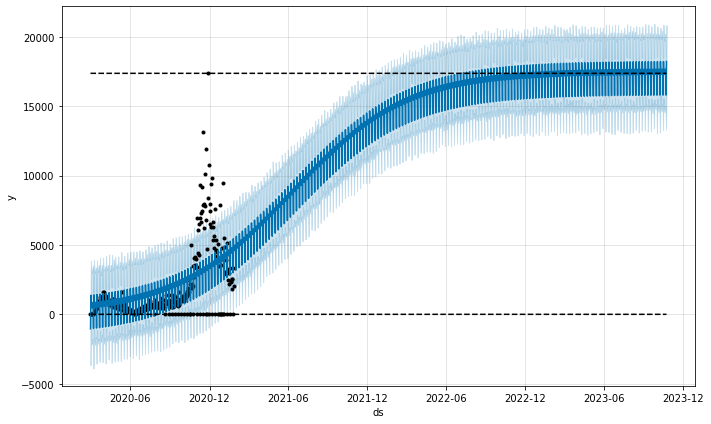

In [4]:
newdata["floor"] = 0
future["floor"] = 0
newdata["cap"] = max(newdata["y"])
future["cap"] = max(newdata["y"])
m = Prophet(growth='logistic')
m.fit(newdata)
import pickle

filename = 'final_model.sav'
pickle.dump(m, open(filename, 'wb'))

fcst = m.predict(future)
fig = m.plot(fcst)

In [5]:
newdata.to_csv("simulation_data.csv")

In [6]:
future.to_csv("simulation_future.csv")